## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**

**1. What is the difference between regression and classification?**

Regression predicts numerical outcomes, and classification predicts categorical outcomes.

**2. What is a confusion table? What does it help us understand about a model's performance?**

A confusion table is a cross table of predicted and actual values. It helps to understand the model's performance for classification as it shows how accurate is the prediction when we compare those values.

**3. What does the SSE quantify about a particular model?**

for each observation i in the validation set, we subtract the predicted value from the true one and square it, then sum over all the observations to get SSE, which is a measure of how far the predicted value from the actual value from the test data set.

**4. What are overfitting and underfitting?**

Underfitting occurs when the model is too simple to reliably explain the phenomenon we are interested in, and overfitting occurs when the model is too complex to reliably explain the phenomenon we are interested in.

**5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?**

The splitting data strategy helps us balance between overfitting and underfitting because we don't want the model to memorize all the data we have during training which make our model overfit and hardly could generalize to unknown data, and also we don't want the model to have only little training which makes our model underfit and perform bad.

**6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.**

For reporting a class label as prediction, it could provides us with a clear result which is simple to interpret, but it also loses uncertainty results (like if the result with label A, is actually coming from a prediction of 0.51 A vs 0.49 B).

For reporting a probability distribution over class labels, it helps to maintain those uncertainties because we have the actual pdf, but then it also makes the result a bit complicated because if we want a specific label result, we need to compute them and then determine the label based on the result, which also makes interpretation a bit more complex but also more flexible.


---

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool

df = pd.read_csv("https://raw.githubusercontent.com/xec9cp/knn_assignment/refs/heads/main/data/USA_cars_datasets.csv")

In [2]:
df = df.loc[:,['mileage','year','price']]

In [3]:
print(df.isnull().sum()) #no missing values
print(df.shape)
df.head()

mileage    0
year       0
price      0
dtype: int64
(2499, 3)


,mileage,year,price
0,274117,2008,6300
1,190552,2011,2899
2,39590,2018,5350
3,64146,2014,25000
4,6654,2018,27700


2. Maxmin normalize `year` and `mileage`.

In [4]:
X = df.loc[:,['year', 'mileage']]
X.describe()

,year,mileage
count,2499.000000,2.499000e+03
mean,2016.714286,5.229869e+04
std,3.442656,5.970552e+04
min,1973.000000,0.000000e+00
25%,2016.000000,2.146650e+04
50%,2018.000000,3.536500e+04
75%,2019.000000,6.347250e+04
max,2020.000000,1.017936e+06


In [5]:
# Maxmin normalization function; Sci-kit calls it the "standard scaler"
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to year and mileage
X = X.apply(maxmin)
X.head()


,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [6]:
y = df['price']
# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

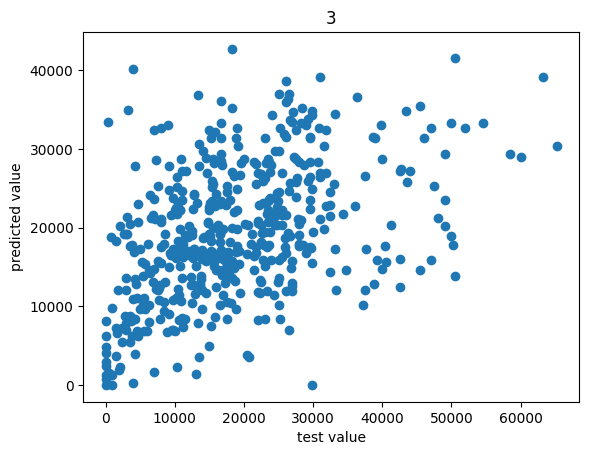

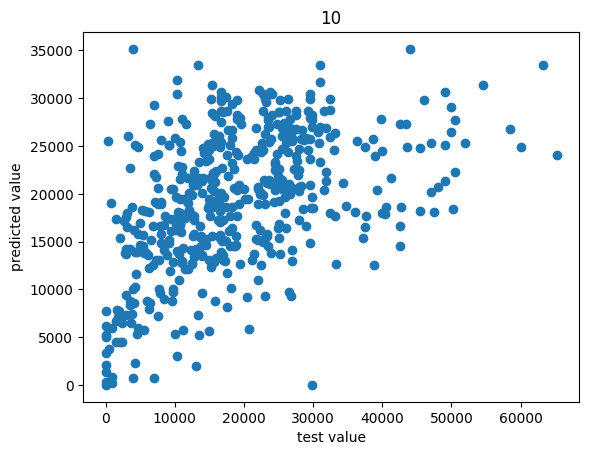

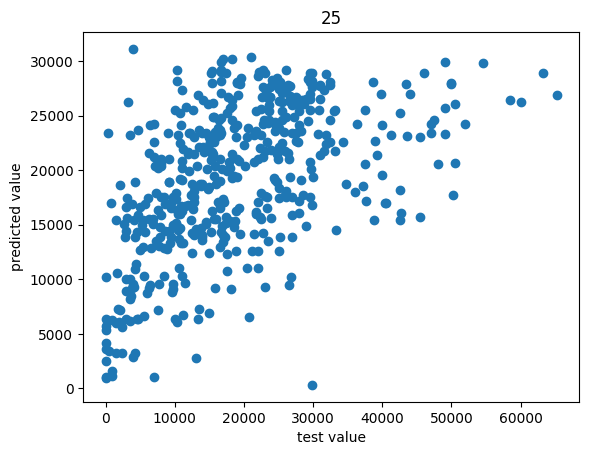

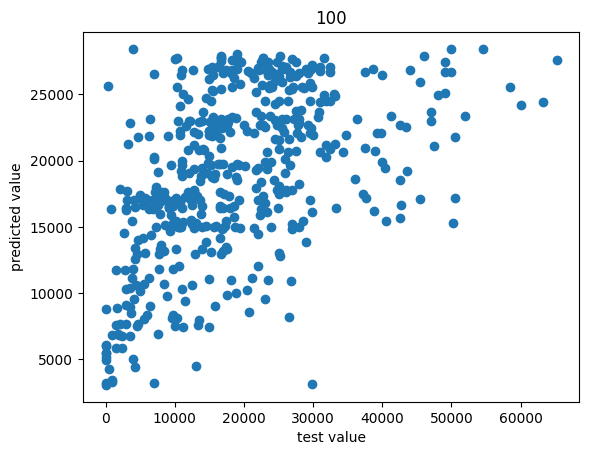

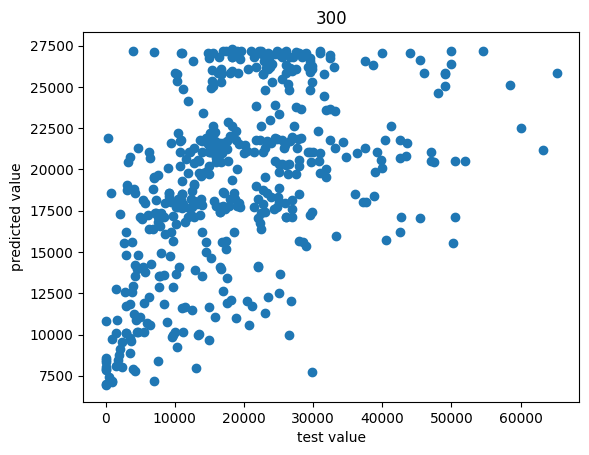

[1.22914616e+08 1.11445257e+08 1.04778574e+08 1.04963724e+08
 1.08031079e+08]


In [7]:
SSE = [] # We'll store the SSE here
k_set = [3,10,25,100,300]
for k in k_set:
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set

    plt.scatter(y_test, y_hat)
    plt.xlabel("test value")
    plt.ylabel("predicted value")
    plt.title(k)
    plt.show()

n = X_test.shape[0]
MSE = np.array(SSE)/(n-2)
print(MSE)

- As k increases, the relationship between test value and predicted value first becomes closer to a y = x line for the lowest predicted value for the test value, and then gradually goes beyond that line.
---

5. Determine the optimal $k$ for these data.

In [16]:
SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = k_set[min_index[0][0]] # Find the optimal value of k
print(k_star)

25


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

- When k is too small, overfitting occurs because our model is too complicated. When k is too big, underfitting occurs because our model is oversimplified by generalizing a lot of data into one group when comes to prediction.
- When k is optimal, the plot shows a pretty straight cut around y=x line.
----

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.